### Project: Loan Eligibility Prediction

- Use **[gender, education, income, credit history, property area]** to make a model to predict **[if a loan will be approved or denied]**
- Identify patterns in **key features**
- Predict **loan amount**
- Identify patterns in **the impact of credit history**
- Identify patterns in **demographic analysis**
- Identify patterns **between loan term and loan eligibility**
- Identify patterns in **the impact of property area**

### Load Libraries

In [57]:
# Import foundational libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical Operations
import seaborn as sns # Statistical Data Visualization
sns.set_theme(style="darkgrid")
import sklearn
import matplotlib.pyplot as plt # Makes Matplotlib works like MATLAB
import matplotlib.patches as mpatches # Creates shapes

# Import plotly (library) for data visualization
import plotly.graph_objs as go # Creates Plotly graphs
from plotly.tools import make_subplots # Creates subplots to combine plots into one figure
from plotly.offline import iplot, init_notebook_mode # Dispalys plotly in Jupyter
init_notebook_mode(connected = True)
import plotly.express as px # Simplifies creating plotly graphs

# Additional Imports
from sklearn.impute import SimpleImputer # Handles missing values
import warnings # Manages warnings
warnings.filterwarnings("ignore")

# Import statistical analysis library (scipy)
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Import algorithm libraries for data analysis
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN

# Version Check
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
print(sns.__version__)
print(plt.matplotlib.__version__)
# print(plotly.__version__) # Only module is used, not full library
# print(stats.__version__) # Has no attribute for version
print(sm.__version__)
# print(imblearn.__version__) # Only module is used, not full library

1.4.4
1.21.5
1.0.2
0.13.2
3.5.2
0.13.2


### Prepare Dataset

In [39]:
# Import the csv data
train = pd.read_csv('../data/raw/loan-train.csv')
test = pd.read_csv('../data/raw/loan-test.csv')
data = train.copy()

In [40]:
# Prints for TRAIN dataset
print(f"Total {train.shape} Columns and Rows in the Train Dataset")
# Shape is stored as a 2D Array; [0] is each line (row) and [1] is each item (col)
print(f"Total {train.shape[0]} Rows in the Train Dataset")
print(f"Total {train.shape[1]} Columns in the Train Dataset \n")

# Prints for TEST dataset
print(f"Total {test.shape} (Rows, Col) in TEST Dataset")

Total (614, 13) Columns and Rows in the Train Dataset
Total 614 Rows in the Train Dataset
Total 13 Columns in the Train Dataset 

Total (367, 12) (Rows, Col) in TEST Dataset


In [41]:
# Data is a copy of TRAIN
data.head() # .head() is from pandas; it views the first few rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
# .info() provides info about the dataframe (what the chart is about)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
# Prints basic stats
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


| Desc | Stats | Result |
| ------|------| -----|
| ApplicantIncome | mean 5403, std 6109 | Large range of income |
| CoapplicantIncome | mean 1621, std 2926 | Large range of income
| LoanAmount | mean 146, std 85 | Large range of loan amounts (in $)
| Loan_Amount_Term | mean 342, std 65 | about 342 months or 28.5 years (in months)
| Credit_History (binary variable; 1 has credit, 0 has none) | mean 0.84, std 0.36 | Most have a credit history

### Univariate Analysis

In [44]:
# Use seaborn to make different graphs
# Args: dataset, column/info, plot type with a default set, colors, size
def plot_data(data, column, plot_type='count', palette=['#2e921b', '#7f1b92'], figsize=(10,6)):
    fig, ax = plt.subplots(figsize=figsize)
    # Shows quantity for each, it's a bar graph
    if plot_type == 'count':
        sns.countplot(x=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Count Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Count", size=12, weight='bold')
        total = len(data[column])
        for p in ax.patches:
            height = p.get_height()
            pct = 100 * height / total
            ax.annotate(f'{pct:.1f}%', (p.get_x()+0.3, height+5), fontsize=12)
    # Shows data points spread on categorical axis (to find clusters or outliers)
    elif plot_type == 'swarm':
        sns.swarmplot(y=column, data=data, ax=ax, palette=palette)
        ax.set_title(f"Swarm Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Value", size=12, weight='bold')
    # Like a bar graph but smooth (shows frequency per value)
    elif plot_type == 'dist':
        sns.histplot(data=data, x=column, ax=ax, kde=True, palette=palette)
        ax.set_title(f"Distribution Plot of {column}", size=15)
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Frequency", size=12, weight='bold')
    # Bar graph but each bar split into sections
    elif plot_type == 'stacked':
        groupby_df = data.groupby(column)['Loan_Status'].value_counts(normalize=True).unstack()
        groupby_df.plot(kind='bar', stacked=True, ax=ax, color=palette)
        ax.set_title(f"Stacked Bar Plot of {column}", size=15, weight='bold')
        ax.set_xlabel(column, size=12, weight='bold')
        ax.set_ylabel("Proportion", size=12, weight='bold')
        ax.legend(title="Loan Status", loc='upper right')
        for i in range(groupby_df.shape[0]):
            for j in range(groupby_df.shape[1]):
                pct = groupby_df.iloc[i, j] * 100
                ax.annotate(f"{pct:.1f}%", xy=(i, groupby_df.iloc[i, :j].sum() + pct/2),
                            ha='center', va='center', color='white', weight='bold')
    else:
        print(f"Invalid plot type: {plot_type}")
    
    plt.show()

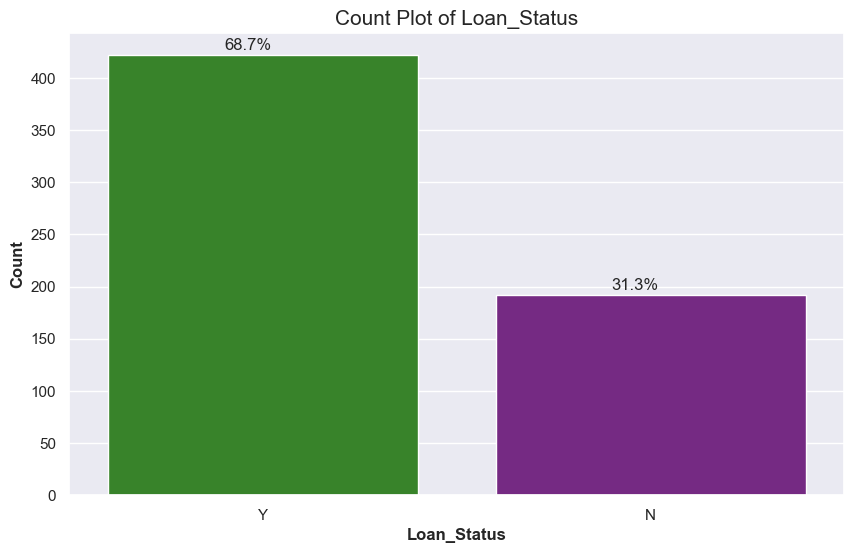

In [45]:
plot_data(data, 'Loan_Status', plot_type='count')

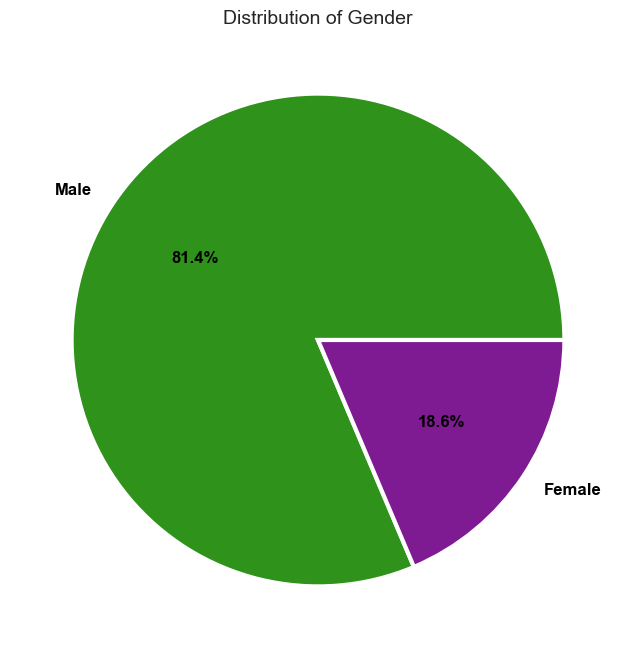

In [46]:
# Gender frequency
gender_counts = data['Gender'].value_counts()
color_pie= ['#2e921b', '#7f1b92']

# Pie Plot
names = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(gender_counts, labels=names, autopct='%.1f%%', colors=color_pie,
       wedgeprops={'linewidth': 3.0, 'edgecolor': '#FFFFFF'},
       textprops={'size': 'medium', 'color':'#000000', 'weight':'bold'})
ax.set_title('Distribution of Gender', fontsize=14)
plt.show()

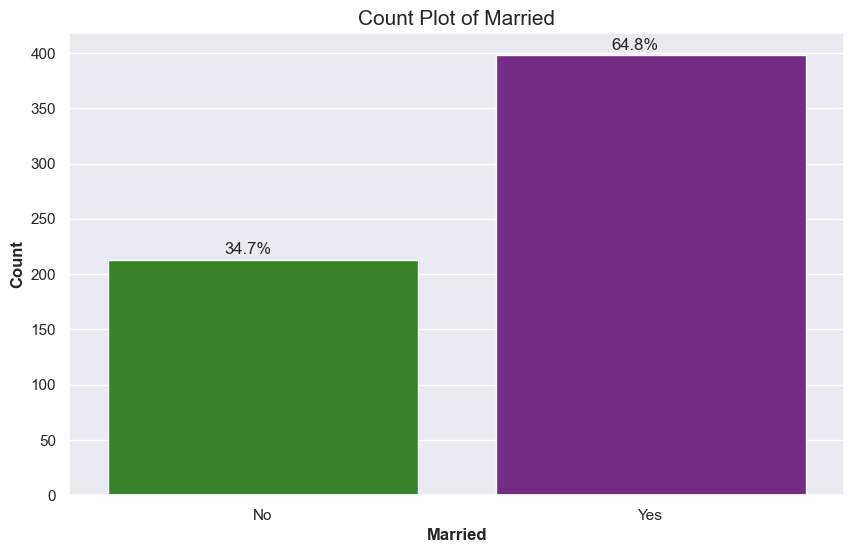

In [47]:
plot_data(data, 'Married', plot_type='count')

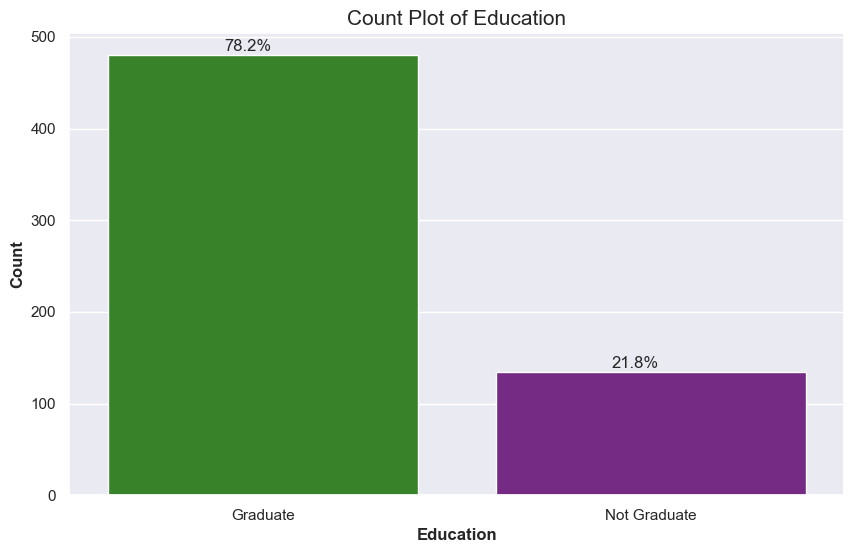

In [48]:
plot_data(data, 'Education', plot_type='count')

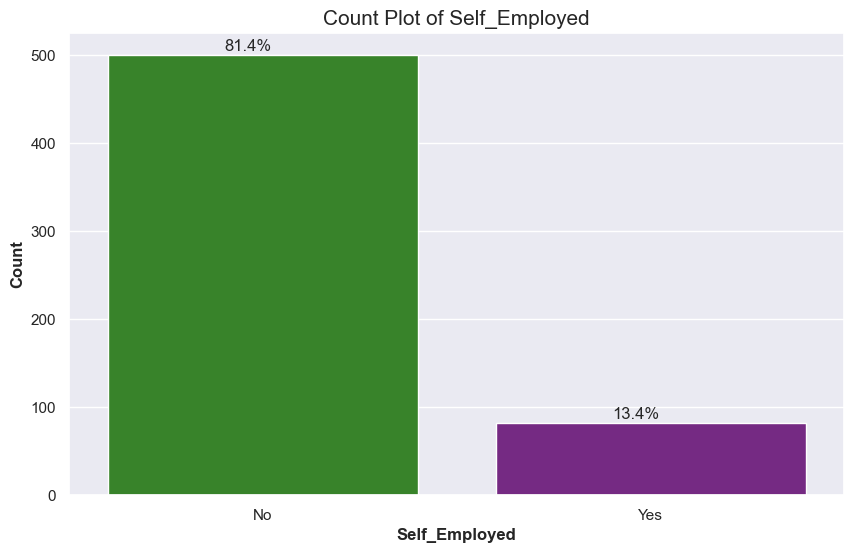

In [49]:
plot_data(data, 'Self_Employed', plot_type='count')

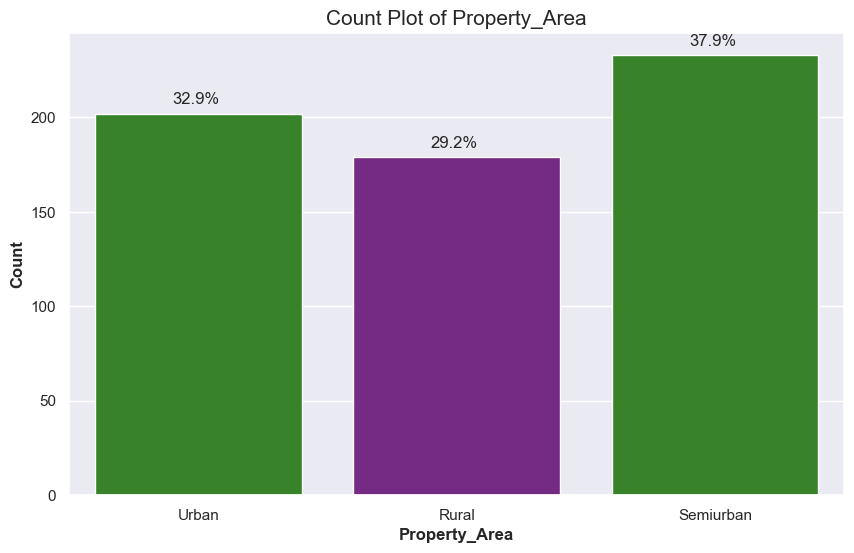

In [50]:
plot_data(data, 'Property_Area', plot_type='count')

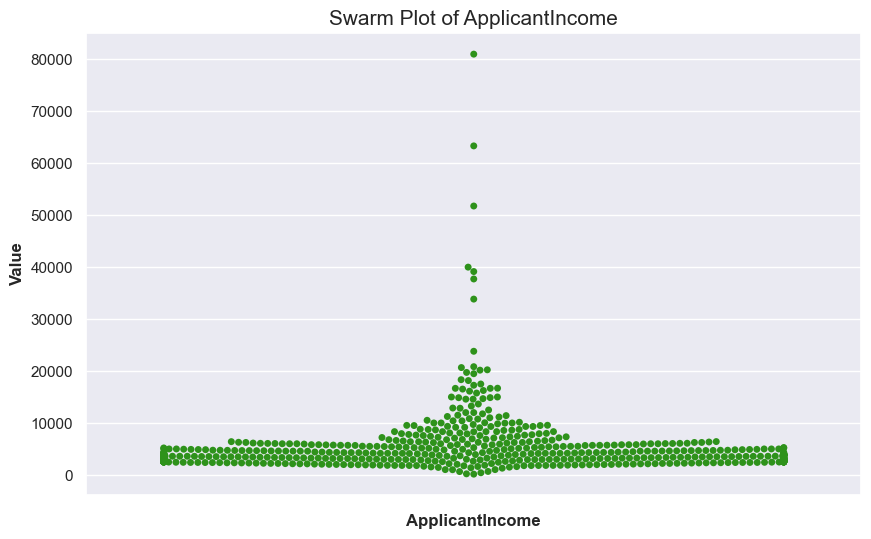

In [51]:
plot_data(data, 'ApplicantIncome', plot_type='swarm')

- It is skewed to most having incomes from 0 to 20,000
- Outliers may be at 80,000

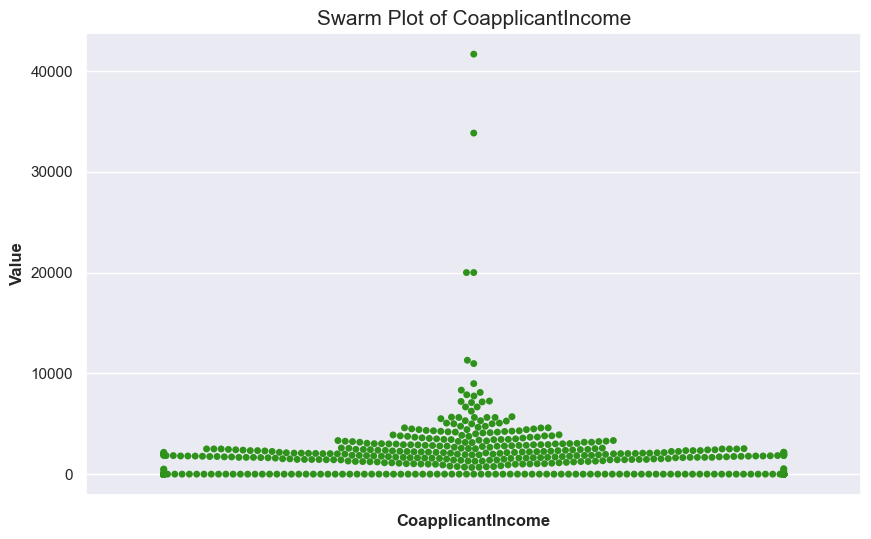

In [52]:
plot_data(data, 'CoapplicantIncome', plot_type='swarm')

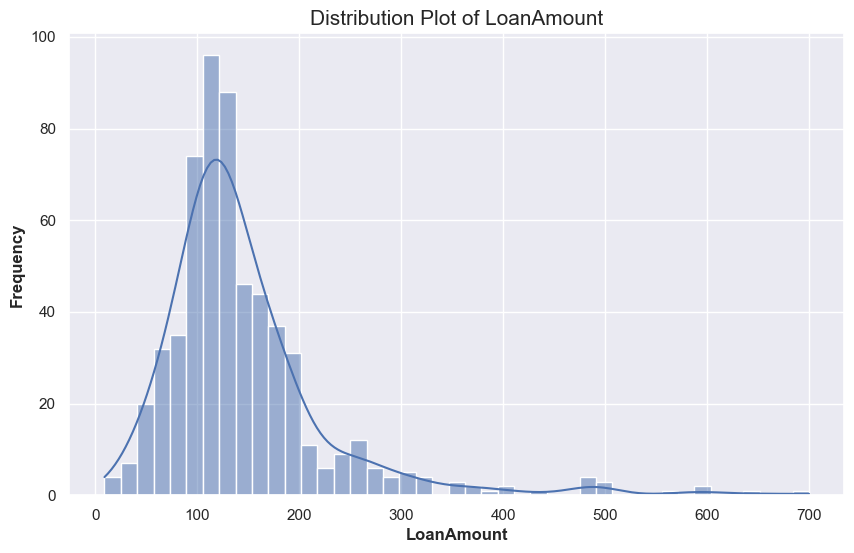

In [53]:
plot_data(data, 'LoanAmount', plot_type='dist')

- Right skewed, most people are getting smaller loans, but a few get large loans

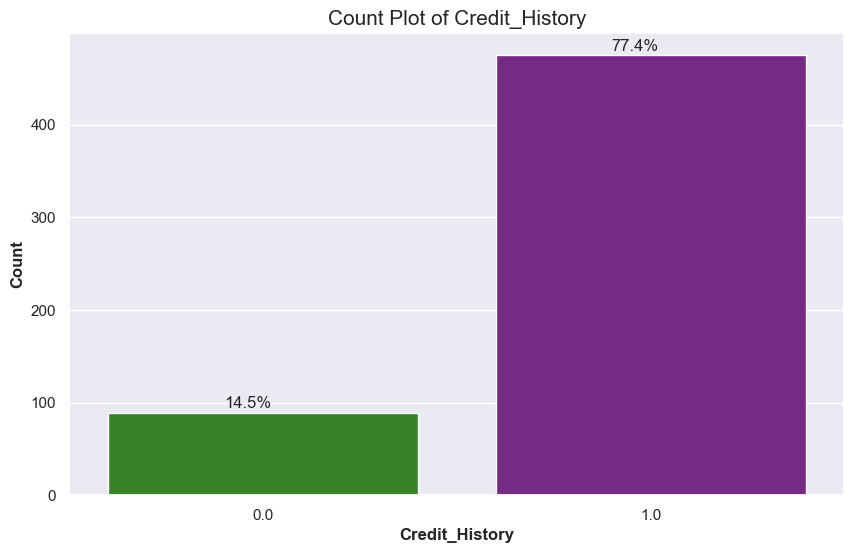

In [54]:
plot_data(data, 'Credit_History', plot_type='count')

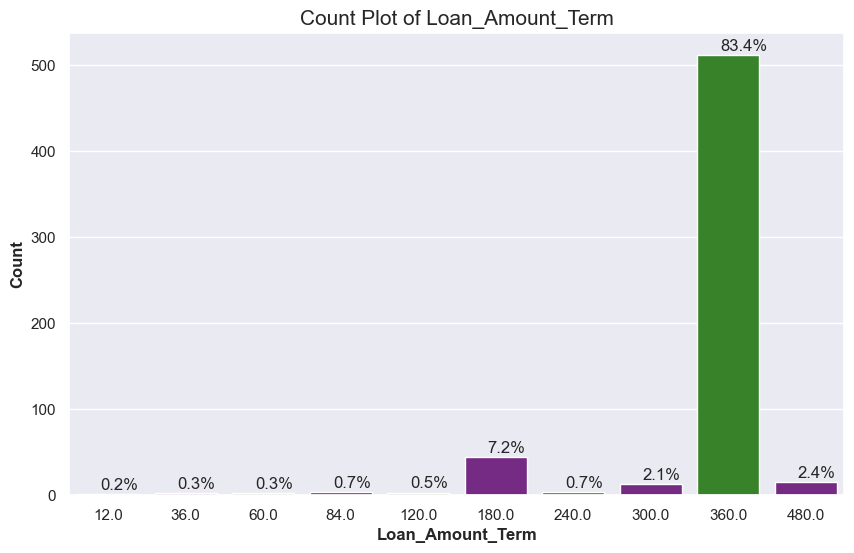

In [55]:
plot_data(data, 'Loan_Amount_Term', plot_type='count')

#### Univariate Analysis (highlights the issue of missing values)
- Loan_Amount_Term had 14 missing values
- Creidt_History has a lot of missing values too
- Outliers seem to be in all cases that skew the data

### Cleaning Up Missing Values